# Exemplo Aula 6 - Prática Distribuições Discretas

## Carregar módulos

In [1]:
import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import binom, poisson

In [7]:
from scipy.stats import binom

# Definindo os parâmetros
n = 10000  # número de tentativas (SMSs enviados)
p = 0.05   # probabilidade de sucesso (cliente acessar o link)
k = 100    # número de sucessos desejados (clientes que acessam o link)

# Calculando a probabilidade usando a função binom.pmf (probability mass function)
probabilidade = binom.pmf(k, n, p)

# Exibindo o resultado
print(f'A probabilidade de exatamente {k} clientes acessarem o link é: {probabilidade:.390f}')

A probabilidade de exatamente 100 clientes acessarem o link é: 0.000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000149622462648176394302733720309153730013195407759416885441896911714782657163012475089682242316398889879263686181346210743377768215637273774280006020602229871693868538734585529465267864207579374057945949938870442240549091898982946777645408253040927701363079085845929697140554992529360


## Carregar dados

In [ ]:
dados = pd.read_csv('acidentes.csv')

In [ ]:
dados.head()

,id_acidente,data_acidente,tipo_lesao,risco_classificacao
0,1,2014-02-11,Laceração,Leve
1,2,2014-02-05,Ferimentos Perfurantes,Médio
2,3,2014-01-31,Contusão,Leve
3,4,2014-01-13,Corte,Leve
4,5,2014-02-14,Contusão,Médio


## Exemplo Histograma

- Preparar os dados

In [ ]:
dados['data_acidente'] = pd.to_datetime(dados['data_acidente'], errors='coerce')

In [ ]:
dados['data_acidente_mensal'] = dados['data_acidente'].dt.strftime('%Y-%m')

In [ ]:
dados_acidentes_mensal = dados.groupby('data_acidente_mensal') \
                              .size() \
                              .to_frame('n') \
                              .reset_index()

In [ ]:
dados_acidentes_mensal.head()

,data_acidente_mensal,n
0,2013-07,1
1,2014-01,15
2,2014-02,12
3,2014-03,11
4,2014-04,10


- Exemplo matplotlib

Text(0, 0.5, 'Frequencia')

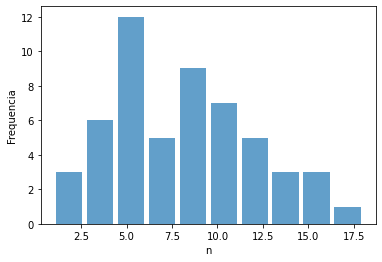

In [ ]:
plt.hist(dados_acidentes_mensal['n'], alpha=0.7, rwidth=0.85)
plt.xlabel('n')
plt.ylabel('Frequencia')

- Exemplo seaborn

Text(0.29999999999999716, 0.5, 'Frequencia')

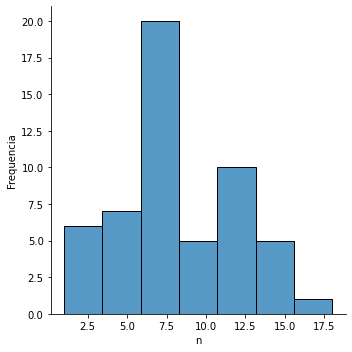

In [ ]:
sns.displot(dados_acidentes_mensal['n'])
plt.ylabel('Frequencia')

## Exemplos simulados

### Distribuição Uniforme

In [ ]:
n = 6
p = 1/n

In [ ]:
resultados = np.arange(1, 7)

In [ ]:
probabilidade = np.repeat(p, n)

In [ ]:
dados_uniforme = pd.DataFrame(resultados, columns=['resultados'])
dados_uniforme['probabilidade'] = probabilidade

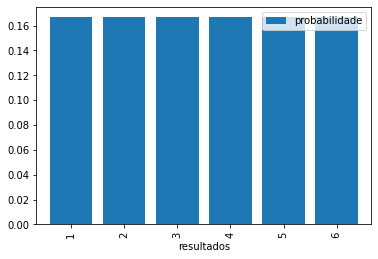

In [ ]:
dados_uniforme.plot(kind = 'bar',
                    x = 'resultados',
                    y = 'probabilidade', width = 0.8)

### Distribuição Bernoulli

In [ ]:
p = 0.2

In [ ]:
resultados = np.arange(0, 2)

In [ ]:
probabilidade = np.array([p, 1-p])

In [ ]:
dados_bernoulli = pd.DataFrame(resultados, columns=['resultados'])
dados_bernoulli['probabilidade'] = probabilidade

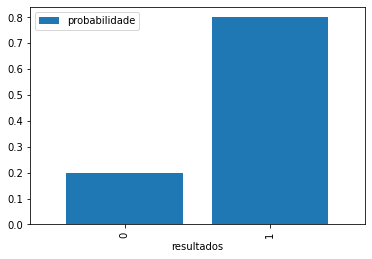

In [ ]:
dados_bernoulli.plot(kind = 'bar',
                     x = 'resultados',
                     y = 'probabilidade', width = 0.8)

### Distribuição Binomial

In [ ]:
n = 5
p = 0.8

In [ ]:
n_sucessos = [i for i in range(n+1)]

In [ ]:
dados_binomial = pd.DataFrame(n_sucessos, columns=['n_sucessos'])

In [ ]:
dados_binomial['probs'] = dados_binomial['n_sucessos'].apply(lambda x: binom.pmf(k=x, n = n, p = p))

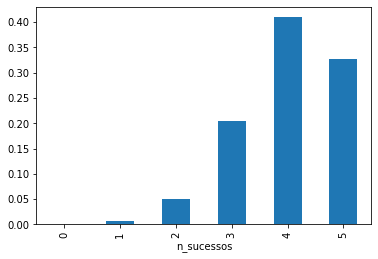

In [ ]:
dados_binomial.plot(kind='bar',
                    x = 'n_sucessos',
                    y = 'probs',
                    legend = None)

### Distribuição Poisson

In [ ]:
n = 15
mu = 2

In [ ]:
resultados = [i for i in range(n+1)]

In [ ]:
dados_poisson = pd.DataFrame(resultados, columns=['n_sucessos'])

In [ ]:
dados_poisson['probs'] = dados_poisson['n_sucessos'].apply(lambda x: poisson.pmf(k=x, mu=mu))

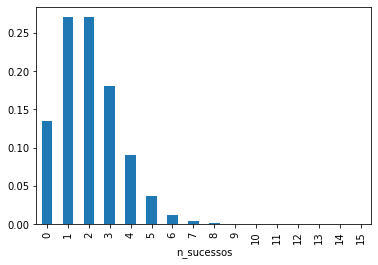

In [ ]:
dados_poisson.plot(kind='bar',
                   x = 'n_sucessos',
                   y = 'probs',
                   legend = None)